In [1]:
from scipy.stats import ttest_ind
import datetime
import pandas as pd
import numpy as np
import pyfolio as pf
from backtester import Backtest
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from strategies.dataset import Dataset

/home/serg/CRYPTO/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [4]:
'''
1. Install ta
https://github.com/bukosabino/ta
'''
data_binance = Dataset()
data = data_binance.get_data(days=90, ticker='BTCUSDT', ts='5m')

# Describe Volume data

In [5]:
'''
The mean volume for 5 minute is 269.95 BTC
Standart devation is 235.57 BTC
The range for 75% of all observations between 143.74 BTC and 310.38 BTC
'''
data.volume.describe()

count    25802.000000
mean       254.045888
std        214.169086
min          0.000000
25%        137.037834
50%        195.183114
75%        293.856587
max       4606.940716
Name: volume, dtype: float64

In [7]:
'''
The histogram is shifted to the right. This means that there are a lot of abnormal volumes.
'''
fig = go.Figure()
fig.add_trace(go.Histogram(x=data.volume, name='Volume'))
fig.show()


In [8]:
'''
https://en.wikipedia.org/wiki/Quantile#:~:text=In%20statistics%20and%20probability%2C%20quantiles,the%20number%20of%20groups%20created.
'''
data['minutes'] = data.index.minute
data['hours'] = data.index.hour
data['days'] = data.index.day_of_week
data['quantile_volume'] =pd.qcut(data['volume'], 5, labels=['very_low', 'low', 'normal', 'high', 'very_high'])
data['quantile_volume'].value_counts()

very_low     5161
very_high    5161
low          5160
normal       5160
high         5160
Name: quantile_volume, dtype: int64

## Analyse volume per minutes

In [9]:
'''
The biggest volume at 5 minutes
The lowest volume at 45 minutes
'''
data.groupby('minutes', as_index=False).agg({'volume': 'mean'})

,minutes,volume
0,0,238.730701
1,5,304.813958
2,10,262.562251
3,15,254.779235
4,20,262.849304
5,25,251.448514
6,30,242.566709
7,35,259.527540
8,40,244.205262
9,45,237.215315


In [10]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data.groupby('minutes', as_index=False).agg({'volume': 'mean'})['volume'], name='Volume'))
fig.show()

In [11]:
pd.crosstab(data['minutes'], data['quantile_volume'])

quantile_volume,very_low,low,normal,high,very_high
minutes,,,,,
0,503,442,445,366,396
5,256,341,399,529,625
10,382,434,400,452,481
15,452,411,430,417,439
20,387,397,442,451,472
25,440,418,440,441,410
30,467,455,445,401,381
35,385,436,438,452,440
40,468,444,441,401,398


## Analyse volume per hours

In [12]:
'''
The biggest volume in 12 hour
The lowest volume at 22 hour
'''
data.groupby('hours', as_index=False).agg({'volume': 'mean'})


,hours,volume
0,0,291.195908
1,1,241.866250
2,2,240.973698
3,3,210.844380
4,4,231.997612
5,5,214.274001
6,6,236.661700
7,7,243.196747
8,8,281.312909
9,9,282.384009


In [13]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data.groupby('hours', as_index=False).agg({'volume': 'mean'})['volume'], name='Volume'))
fig.show()

In [14]:
pd.crosstab(data['hours'], data['quantile_volume'])

quantile_volume,very_low,low,normal,high,very_high
hours,,,,,
0,122,182,230,246,301
1,219,240,236,186,199
2,279,243,173,190,173
3,333,230,188,176,132
4,267,242,196,181,165
5,294,248,225,165,135
6,245,212,232,194,185
7,203,244,216,218,187
8,141,213,221,241,254


## Analyse volume per days

In [15]:
data.groupby('days', as_index=False).agg({'volume': 'mean'})


,days,volume
0,0,285.803013
1,1,283.265525
2,2,269.422001
3,3,247.469252
4,4,266.438124
5,5,205.619992
6,6,215.999847


In [16]:
fig = go.Figure()
fig.add_trace(go.Bar(x=data.groupby('days', as_index=False).agg({'volume': 'mean'})['volume'], name='Volume'))
fig.show()

In [17]:
pd.crosstab(data['days'], data['quantile_volume'])

quantile_volume,very_low,low,normal,high,very_high
days,,,,,
0,559,724,777,822,862
1,564,670,784,795,901
2,482,721,766,897,878
3,618,802,821,807,681
4,634,698,769,763,880
5,1092,798,624,503,423
6,1212,747,619,573,536


### Statistical Test

In [18]:
'''
What is  T - test?
https://www.investopedia.com/terms/t/t-test.asp
With this test, we determine that the values are not random. If the values are greater than 5%, then we can reject the hypothesis that the values are random.

'''
group = data.groupby('minutes')['volume'].apply(lambda x:list(x))
for index, value in group.iteritems():
    statistical_test =ttest_ind(data['volume'], value, equal_var=False)
    if statistical_test[1] > 0.05:
        print(index ,statistical_test)

10 Ttest_indResult(statistic=-1.8613758204272828, pvalue=0.06280551045394295)
15 Ttest_indResult(statistic=-0.14496372672226382, pvalue=0.8847512931082926)
20 Ttest_indResult(statistic=-1.6966613414651495, pvalue=0.08988714056461092)
25 Ttest_indResult(statistic=0.516662468477691, pvalue=0.6054377908034851)
35 Ttest_indResult(statistic=-1.1634114409747738, pvalue=0.24477193278564605)
50 Ttest_indResult(statistic=0.7095167579709407, pvalue=0.47806941617469556)


## Backtest

### Simple backtest

<AxesSubplot:xlabel='time'>

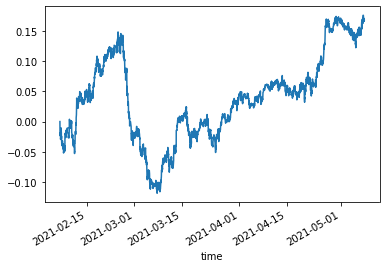

In [19]:
LAG = 3
data.loc[:, 'y'] = data['close'].shift(-LAG).pct_change()
data = data.dropna()
# data.loc[:, 'signal'] = np.where((data['quantile_volume'] == 'very_low') | (data['quantile_volume'] == 'low'), 1, 0)
data.loc[:, 'signal'] = np.where(data['quantile_volume'] == 'normal', 1, 0)
# data.loc[:, 'signal'] = np.where(data['quantile_volume'] == 'very_low', -1, data['signal'])
data[data['signal'] == 1]['y'].cumsum().plot()

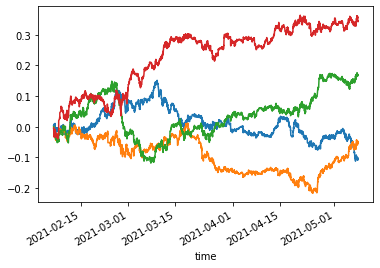

In [20]:
lags = np.arange(1, 5)
for i in lags:
    data.loc[:, 'y'] = data['close'].shift(-i).pct_change()
    data = data.dropna()
    # data.loc[:, 'signal'] = np.where((data['quantile_volume'] == 'very_low') | (data['quantile_volume'] == 'low'), 1, 0)
    data.loc[:, 'signal'] = np.where(data['quantile_volume'] == 'normal', 1, 0)
    data[data['signal'] == 1]['y'].cumsum().plot() # Find input lebels


## Revise statistical effect

In [21]:
'''
If pvalue more than 0.05 (5%). It means statistics is working. We could input this statisitcal in our strategy
'''
ttest_ind(
    data[data['signal'] == 1]['y'],
    data['y'], equal_var=False
    )

Ttest_indResult(statistic=1.2237846708597355, pvalue=0.22106965706238074)

In [22]:
'''
1. Make hypotesis  (your ideas)
1.1. Describe statistical
2. Check statistical using t-test (find p-Value). If it (more than 5%) working go in next step
3. Create simple backtest
3.1 Find the best lag
4. Use comples backtest (take profit, stop loss, kind of backtest: "exit by signal", "exit by lag", "exit by take profit or stopp loss")

'''

'\n1. Make hypotesis  (your ideas)\n1.1. Describe statistical\n2. Check statistical using t-test (find p-Value). If it (more than 5%) working go in next step\n3. Create simple backtest\n3.1 Find the best lag\n4. Use comples backtest (take profit, stop loss, kind of backtest: "exit by signal", "exit by lag", "exit by take profit or stopp loss")\n\n'

<AxesSubplot:xlabel='time'>

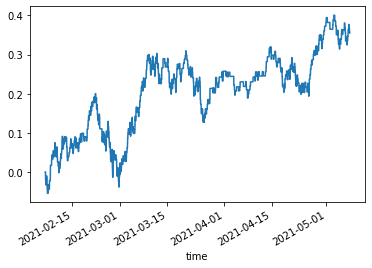

In [23]:
'''
Exit by signal
'''
back = Backtest()
returns = back.exit_by_signal(data=data, take_profit=0.01, stop_loss=-0.01, comission=0)
returns['cumsum'].plot()

<AxesSubplot:xlabel='time'>

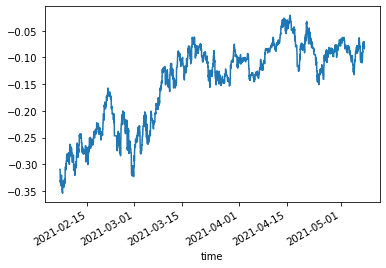

In [24]:
'''
Exit by lag
'''
returns = back.exit_by_lag(data=data, take_profit=0.01, stop_loss=-0.01, lag=5, comission=0)
returns['cumsum'].plot()

<AxesSubplot:xlabel='time'>

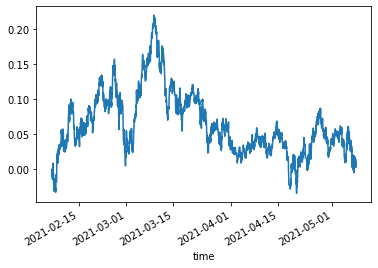

In [25]:
'''
Exit by take profit and stop loss
'''
returns = back.exit_by_take(data=data, take_profit=0.003, stop_loss=-0.003, comission=0)
returns['cumsum'].plot()

### Add new variabels to improve result

In [26]:
#### Add support line and resistance line
ROLLING_WINDOW = 12
SIGMA = 2
data['std'] = data['close'].pct_change().rolling(ROLLING_WINDOW).std()
sigma = data['std'].mean() * SIGMA
data.loc[:, 'support_line'] = np.where(data['std'] < SIGMA, 1, 0)
data.loc[:, 'resistance_line'] = np.where(data['std'] > SIGMA, 1, 0)
print(sigma)


0.0048641699903052785


In [27]:
data_hm = data.copy()
data_hm['signal'] = np.where((data['signal'] == 1) & (data['support_line'] == 1), 1, 0)

<AxesSubplot:xlabel='time'>

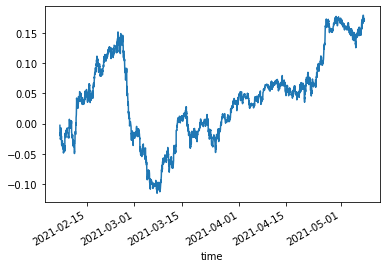

In [28]:
LAG = 3
data_hm.loc[:, 'y'] = data_hm['close'].shift(-LAG).pct_change()
data_hm = data_hm.dropna()
data_hm.loc[:, 'signal'] = np.where(data_hm['quantile_volume'] == 'normal', 1, 0)
data_hm[data_hm['signal'] == 1]['y'].cumsum().plot()